# <font color='darkblue'>Potencial de Hénon-Heiles</font>


La demostración de Poincaré acerca de que el problema de los tres cuerpos no tenía solución analítica conllevó a probar que el caos es la forma en que estos sistemas irresolubles evolucionan. El sistema Hénon-Heiles ha sido uno de los sistemas más populares para demostrar cómo comienza el caos en un sistema. Esto se hace dejando que la energía del movimiento se acerque a la energía delimitadora del sumidero potencial que rodea el centro del potencial [1].

El problema surge en 1962 cuando, Michel Hénon y Carl Heiles trabajaban en el movimiento no lineal de una estrella en torno a un centro galáctico con el movimiento restringido a un plano. Dos integrales de movimiento conocidas, hasta se momento, eran la energía orbital total y el momento angular por unidad de masa de la estrella, pero el movimiento observado de ciertas estrellas sugería que una ligadura adicional podría restringir los movimientos posibles [2]. En su artículo _"The applicability of the third integral of motion: Some numerical experiments"_ querían encontrar una tercera integral del movimiento en la dinámica galáctica, por lo cual tomaron un potencial axi-simétrico no lineal bidimensional, y descubrieron que la tercera integral existía solo para un número limitado de condiciones iniciales, es decir, las que correspondían a las órbitas caóticas [3].

El potencial propuesto puede verse como dos osciladores armónicos que han sido acoplados por los términos de perturbación (dado que el coeficiente $\lambda$ es pequeño): $(x^2y- \frac{y^3}{3})$.

$$ V(x,y) = \frac{1}{2}(x^2+y^2) + \lambda \left(x^2y- \frac{y^3}{3} \right)$$

In [1]:
import matplotlib
import pandas, numpy, time #, theano, 
import numpy as np
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout#, TimeDistributed
from keras.layers.recurrent import LSTM
from tensorflow.keras.backend import clear_session

Using TensorFlow backend.
/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/daniand

In [2]:
plt.rcParams['figure.figsize'] = 10, 7
axis_font = {'size' : 20}

matplotlib.rc('font', **axis_font)

Text(0.5, 0, 'y')

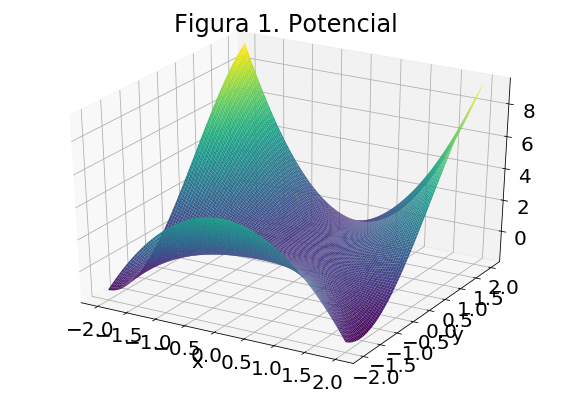

In [3]:
def potential(x,y,lamb):
    v = 0.5*((x**2)+(y**2)) + lamb*((y*(x**2))-((y**3)/3))
    return v

V_6 = lambda X,Y: np.ones(len(X))*1/6

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

X, Y = np.meshgrid(x, y)
Z = potential(X, Y, 1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.title('Figura 1. Potencial')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'V(x,0)')

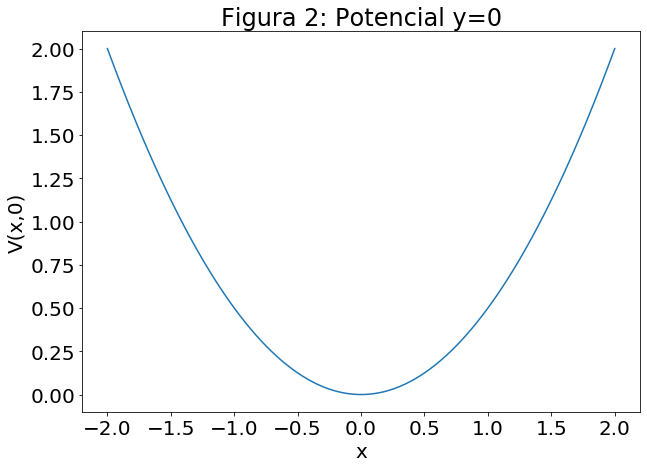

In [4]:
plt.plot(x,potential(x,np.zeros(len(y)),1)) # y = 0
plt.title('Figura 2: Potencial y=0')
plt.xlabel('x')
plt.ylabel('V(x,0)')

Text(0, 0.5, 'V(0,y)')

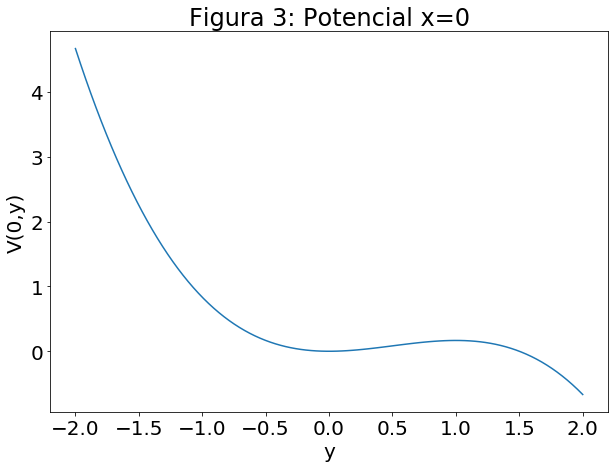

In [5]:
plt.plot(y,potential(np.zeros(len(y)),y,1))   # x=0
plt.title('Figura 3: Potencial x=0')
plt.xlabel('y')
plt.ylabel('V(0,y)')

Del problema surgen las ecuaciones de movimiento:

$$\ddot{x} = -x-2xy$$
$$\ddot{y} = -y-x^2+y^2$$

Para simplificar los cálcualo numéricos, Hénon y Heiles expresaron el hamiltoniano con unidades adimensionales (con $\lambda = 1$) al igual que la energía:

$$H = E = \frac{1}{2} \dot{x}^2 + \frac{1}{2}\dot{y}^2 + \frac{1}{2}x^2 + \frac{1}{2}y^2 + x^2y- \frac{y^3}{3} $$


El potencial de Hénon-Heiles tiene una energía de escape finita $H_{esc} = \frac{1}{6}$. Para valores de energía H < $H_{esc}$, las curvas equipotenciales del sistema son cerradas, lo que hace imposible el escape. Sin embargo, para niveles de energía más grandes H > $H_{esc}$, las curvas equipotenciales se abren _(Ver figura 4)_ y aparecen tres canales de salida a través de los cuales las partículas de prueba pueden escapar al infinito.

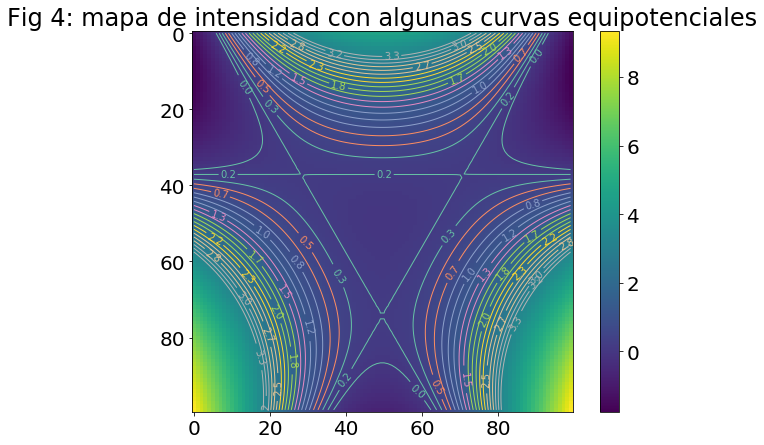

In [6]:
X, Y = np.meshgrid(x, y)
Z = potential(X, Y, 1)
 
im = imshow(Z)              # drawing the function

# adding the Contour lines with labels
cset = contour(Z,np.arange(0,10/3,1/6),linewidths=1,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right

# latex fashion title
title('Fig 4: mapa de intensidad con algunas curvas equipotenciales')
show()

____

El área de movimiento permisible y las curvas de velocidad 0 se expresan por la desigualdad:

$$-\frac{1}{2}(x^2+y^2)-xy^2 + \frac{1}{3}x^3 + E \geq 0$$

#### Se ve que los puntos de equilibrio del campo de fuerza son:

Un punto de equilibrio estable en $(x, y)_1 = (0,0)$ y tres puntos de silla: $(x, y)_{2,3,4} = (0,1), (\sqrt{3/2}, −1 / 2)$, $(- \sqrt{3/2}, −1 / 2)$.

Y la energía es $E = 0$ para $(x,y)_1$ y 
$E = \frac{1}{6}$ para $(x, y)_{2,3,4}$


Los **puntos de silla** constituyen las tres esquinas de la curva equipotencial $V = 1/6$, (ver figura 4). El área triangular que está limitada por esta curva equipotencial corresponde a la energía de movimiento inferior a 1/6, incluyendo el la energía $E=0$ que correponde al punto de equilibrio estable.

Para niveles bajos de energía, el movimiento es completamente regular, mientras que a medida que aumenta el valor de la energía, aparece el caos y varias familias resonantes. El objetivo es distinguir entre órbitas ordenadas y caóticas para valores de energía siempre más bajos que la energía de escape.

Text(0, 0.5, 'y')

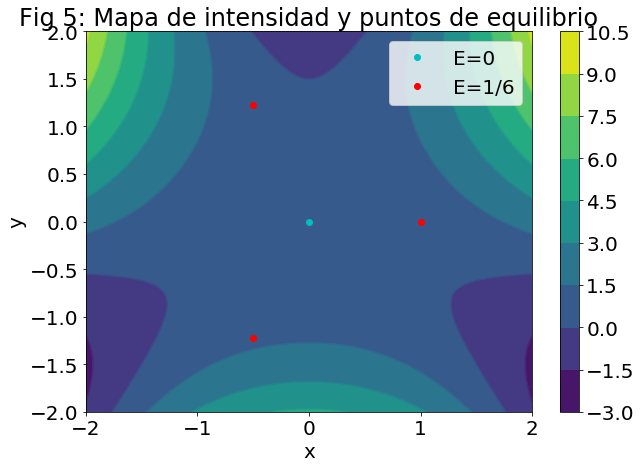

In [7]:
X, Y = np.meshgrid(x, y)
Z = potential(X, Y, 1)
 
fig, ax = plt.subplots()
cs = ax.contourf(X,Y,Z)
ax.contour(cs)
plt.plot(0,0, "o", color="c", label="E=0")
plt.plot(1,0, "o", color="red", label="E=1/6")
plt.plot(-0.5,np.sqrt(3/2), "o", color="red")
plt.plot(-0.5,-np.sqrt(3/2), "o", color="red")
plt.legend()
fig.colorbar(cs) # Add a colorbar to a plot
ax.set_title('Fig 5: Mapa de intensidad y puntos de equilibrio')
ax.set_xlabel('x')
ax.set_ylabel('y')

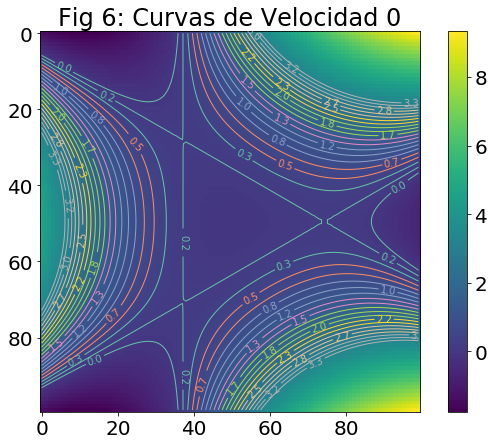

In [8]:
def cero_velocity(x,y):
    return 0.5*(x**2+y**2)+(x*y**2)-((1/3)*x**3) #Energía

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)


X, Y = np.meshgrid(x, y)    
Z = cero_velocity(X, Y)
im = imshow(Z)              # drawing the function

# adding the Contour lines with labels
cset = contour(Z,np.arange(0,10/3,1/6),linewidths=1, cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
title('Fig 6: Curvas de Velocidad 0')
show()

____
Reescribo el Hamiltoniano de Hénon-Heiles:
$$H = \frac{1}{2}(p_x^2+p_y^2) + \frac{1}{2}(x^2+y^2) + \left(x^2y- \frac{y^3}{3} \right)$$

Donde surge un sistema de 4 ecuaciones diferenciales:


$$ \dot{x} = p_x$$
$$ \dot{y} =p_y$$

$$ \dot{p_x} = -x-2xy$$
$$ \dot{p_y} =-y-(x^2-y^2)$$

### Condiciones iniciales: 

Para el espacio físico $(x, y)$, se consideran órbitas con condiciones iniciales $(x_o, y_o)$ con $\dot{y_o} = 0$, mientras que el valor inicial de $\dot{x_o}$ se obtiene de la integral de energía $\dot{x_o} = \dot{x_o}(x_o,y_o,E) > 0$. De manera similar, para el espacio de fase $(y, \dot{y})$ , se consideran órbitas con condiciones iniciales $(y_o, \dot{y_o})$ con $x_o = 0$ y $\dot{x_o}$ igualmente con la integral de energía, la cual es:
$$\dot{x} = \sqrt{2E -\dot{y}^2 - x^2 - y^2 - 2x^2y + \frac{2}{3} y^3} > 0$$ 


In [9]:
def xdot(x,y,ydot,E):
    xdot = np.sqrt(2*(E-((0.5*ydot**2)+(0.5*x**2)+ (0.5*x**2)+ (0.5*y**2) + (y*x**2) - ((1/3)*y**3))))
    return xdot 

def pend(y, t, xo_, yo_, xdot_, ydot_):
    X, Y, PX, PY = y
    dydt = [PX, PY, -X-(2*X*Y), -Y-(X**2 - Y**2)]
    return dydt


def condi(n, f, xo_, yo_, xdot_, ydot_):
    y0 = [xo_, yo_, xdot_, ydot_]
    t = np.linspace(0, 400, 1000)
    sol = odeint(f, y0, t, args=(xo_, yo_, xdot_, ydot_))
    
    plt.plot(sol[:, 0], sol[:, 1], 'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()
    
    return sol


Según el artículo de E.Zotos [4] se encuentran los distintos tipos de órbitas (Ver figura 7) con las siguientes condiciones iniciales: 

- La **órbita de caja**, es decir, en el que la estrella oscila independientemente a lo largo de los tres ejes a medida que se mueve a través del sistema, se da con: $(x_o, y_o, \dot{y_o} , E) = ( 0.0, -0.082, 0.0, 0.02)$

- Cuando el valor de la energía se aproxima muy cerca de la energía de escape, específicamente para $h> 0.12$, las órbitas caóticas son las que más están presentes, sin embargo, todavía hay pequeñas islas de estabilidad embebidas y se pueden lograr con:  $(x_o, y_o, \dot{y_o} , E) = ( 0.0,  0.54846395,  0.0,  0.123)$

- Condiciones para una **órbita caótica**: $(x_o, y_o, \dot{y_o} , E) = ( 0.0,  0.82,  0.0,  0.16)$

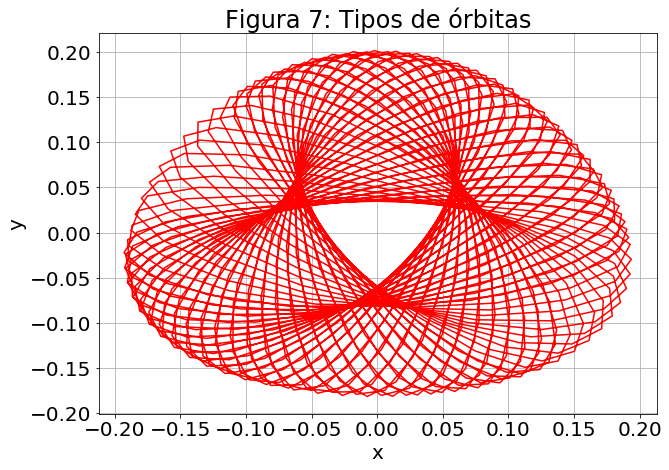

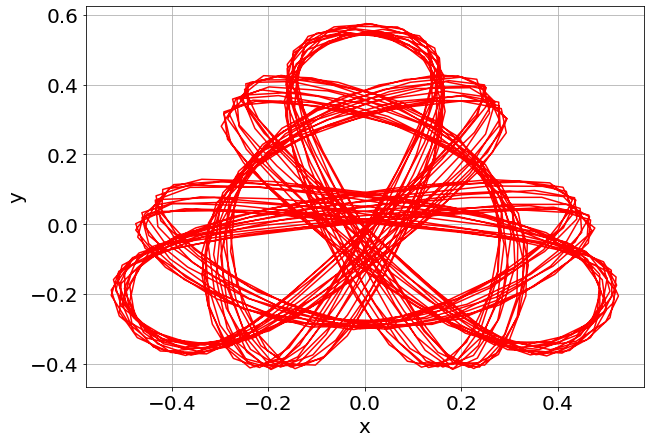

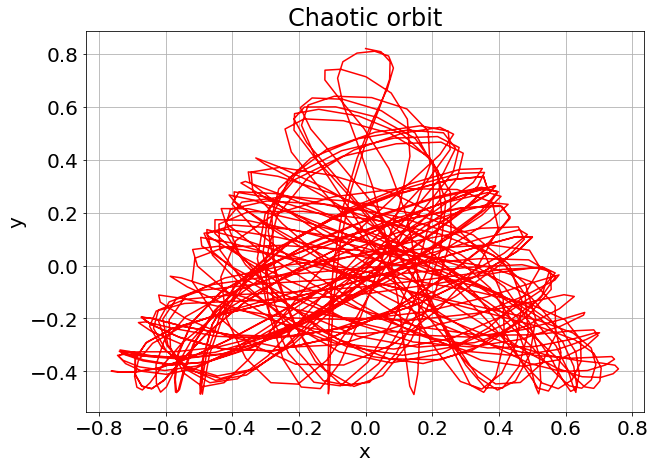

In [10]:
def box_orbit():
    yo_= -0.082
    xo_= 0.0
    ydot_= 0.0
    E_ = 0.02

    xdot_ = xdot( xo_,yo_, ydot_, E_)

    condi(1000, pend, xo_, yo_, xdot_, ydot_)

    
def chaos_start():
    yo_= 0.54846395
    xo_= 0.0
    ydot_= 0.0
    E_ = 0.123

    xdot_ = xdot( xo_,yo_, ydot_, E_)

    condi(1000, pend, xo_, yo_, xdot_, ydot_)
    
def chaotic_orbit():
    plt.title('Chaotic orbit')
    yo_= 0.82
    xo_= 0.0
    ydot_= 0.0
    E_ = 0.16

    xdot_ = xdot( xo_,yo_, ydot_, E_)

    condi(1000, pend, xo_, yo_, xdot_, ydot_)
    
    
plt.title('Figura 7: Tipos de órbitas')
box_orbit()
chaos_start()
chaotic_orbit()

____

## Órbitas caóticas:

Se definirá una condición $(x_o,y_o,px_o,py_o)$ ubicada, en la región caótica. Sea el tiempo inicial t=0 y el tiempo final t=400.
Se integrarán numéricamente las ecuaciones de Hamilton para construir una tabla de 5 columnas: $(t,x_t,y_t,px_t,py_t)$.

In [11]:
def chaotic_orbit_table():
    
    #initial conditions:
    yo_= 0.82
    xo_= 0.0
    ydot_= 0.0
    E_ = 0.16
    xdot_ = xdot(xo_,yo_, ydot_, E_)
    
    #integrate
    y0 = [xo_, yo_, xdot_, ydot_]
    t = np.linspace(0, 400, 1000000)
    sol = odeint(pend, y0, t, args=(xo_, yo_, xdot_, ydot_))
    
    ''' Shape: (1000, 4)
    plt.plot(t, sol[:, 0], 'b', label='x') sería todas las filas (t), columna 1 (x)  ''' 

    return sol

In [12]:
solution = chaotic_orbit_table()
np.savetxt("data.csv", solution, delimiter=",")

np.shape(solution)

(1000000, 4)

### Gráficas de los datos tomados del archivo con los resultados de la integración 

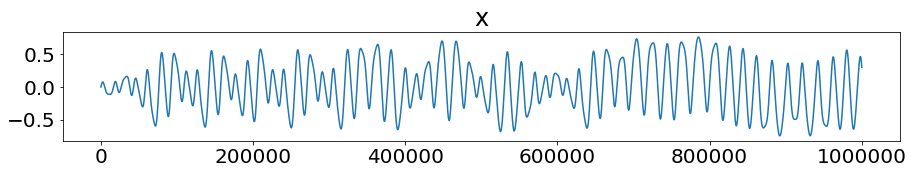

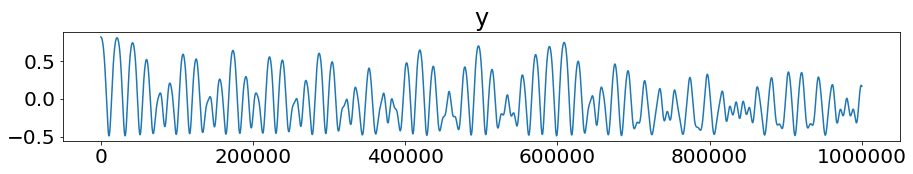

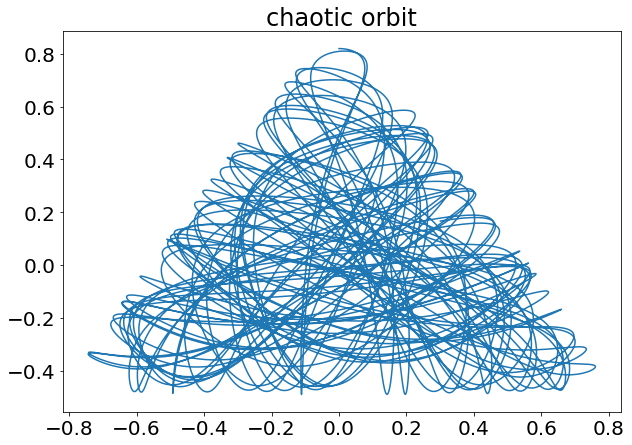

In [13]:
xset = pandas.read_csv('data.csv', usecols=[0], engine='python', skipfooter=3)
xset = xset.values
xset = xset.astype('float32')
plt.figure(figsize=(15,2))
plt.title('x')
plt.plot(xset)

yset = pandas.read_csv('data.csv', usecols=[1], engine='python', skipfooter=3)
yset = yset.values
yset = yset.astype('float32')
plt.figure(figsize=(15,2))
plt.title('y')
plt.plot(yset)

plt.figure()
plt.title('chaotic orbit')
plt.plot(xset, yset)


____
# Machine Learning 
## Separar datos para el train y test 

In [14]:
dataset = pandas.read_csv('data.csv', engine='python', skipfooter=3)
dataset = dataset.values
dataset = dataset.astype('float32')

In [15]:
#normalizar los datos 
np.random.seed()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [16]:
#Separar los datos: datos de entrenamiento un 67%

train_size  = int(len(dataset) * 0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train.shape, test.shape)

(669997, 4) (329999, 4)


In [17]:
print(test.shape)

(329999, 4)


"La función toma dos argumentos: el conjunto de datos, que es una matriz NumPy que queremos convertir en un conjunto de datos, y el look_back, que es el número de pasos de tiempo anteriores para usar como variables de entrada para predecir el próximo período de tiempo, en este caso a 3"[5].

El valor predeterminado creará un conjunto de datos donde "X" son las variables $(x,y,px,py)$ en un momento dado $(t)$ y "Y" en la 3ra próxima $(t + 3)$.

La red tiene una capa visible con 1 entrada, una capa oculta con 4 bloques LSTM o neuronas, y una capa de salida que hace una predicción de un solo valor. La función de activación sigmoidea predeterminada se usa para los bloques LSTM. La red utiliza un tamaño de lote de 10.

In [18]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    
    
    return numpy.array(dataX), numpy.array(dataY)


In [19]:
look_back=3
ktrainX, trainY = create_dataset(train, look_back)
ktestX, testY   = create_dataset(test, look_back)

La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz específica en forma de: 

[muestras, pasos de tiempo, características].

In [20]:
print("full original signal     ", dataset.shape)
print("original signal            train", train.shape, "test", test.shape)
print("keras input signal         train", ktrainX.shape, "test", ktestX.shape)

print(trainY.shape, testY.shape)

full original signal      (999996, 4)
original signal            train (669997, 4) test (329999, 4)
keras input signal         train (669994, 3, 4) test (329996, 3, 4)
(669994, 4) (329996, 4)


### Redes Neuronales Recurrentes  - Método 1:

In [21]:
def get_model(lstm_size, input_shape):
    clear_session()
    model = Sequential()
    lstm = LSTM(units=lstm_size, input_shape=input_shape, recurrent_activation="sigmoid")
    dense = Dense(4)
    model.add(lstm)
    model.add(dense)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [22]:
## build RNN

model = get_model(50, input_shape=[3,4])
clear_session()
model = Sequential()
lstm = LSTM(units=50, input_shape=[3,4], recurrent_activation="sigmoid")
dense = Dense(4)
model.add(lstm)
model.add(dense)
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
mhist = model.fit(ktrainX, trainY, epochs=5, batch_size=10, verbose=1)


Epoch 1/5
669994/669994 [==============================] - 318s 474us/step - loss: 8.2214e-05
Epoch 2/5
669994/669994 [==============================] - 295s 441us/step - loss: 1.2510e-06
Epoch 3/5
669994/669994 [==============================] - 315s 470us/step - loss: 9.3420e-07
Epoch 4/5
669994/669994 [==============================] - 314s 468us/step - loss: 7.1967e-07
Epoch 5/5
669994/669994 [==============================] - 317s 473us/step - loss: 5.9891e-07s - loss: 


In [24]:
y_train_pred = model.predict(ktrainX)
y_test_pred = model.predict(ktestX)

print(y_train_pred.shape, y_test_pred.shape, len(y_train_pred), len(y_test_pred))

(669994, 4) (329996, 4) 669994 329996


In [25]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(y_train_pred)+look_back, :] = y_train_pred

print(y_train_pred.shape, y_test_pred.shape, len(dataset))

(669994, 4) (329996, 4) 999996


In [26]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(y_train_pred)+(look_back*2):len(dataset)+1, :] = y_test_pred

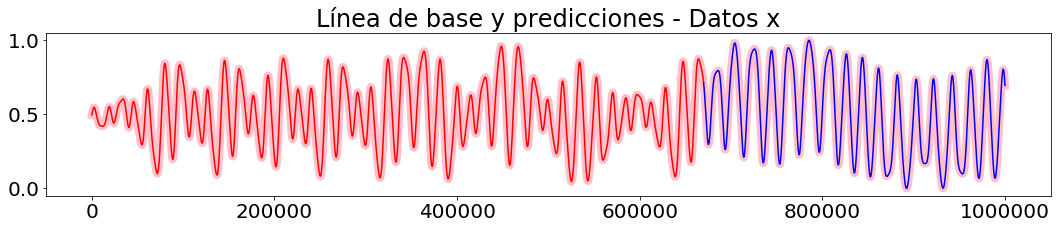

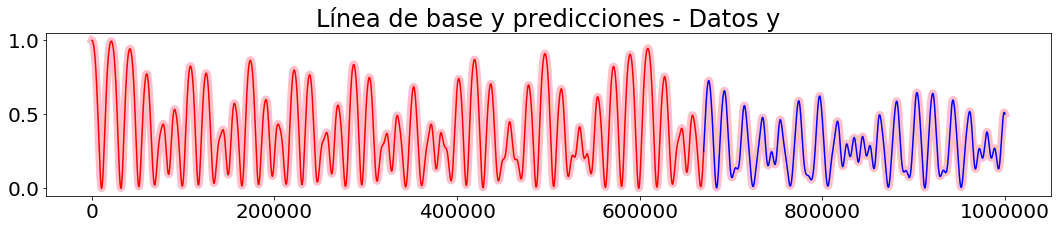

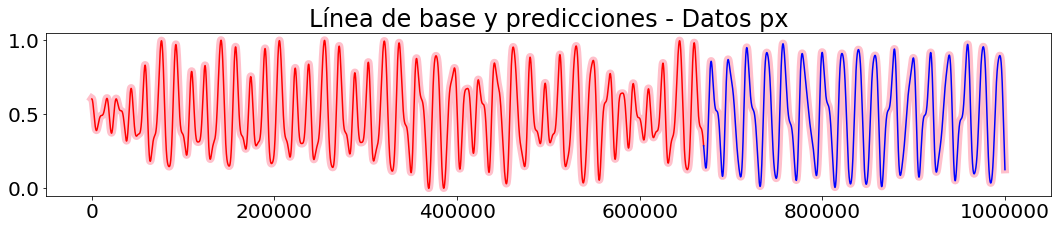

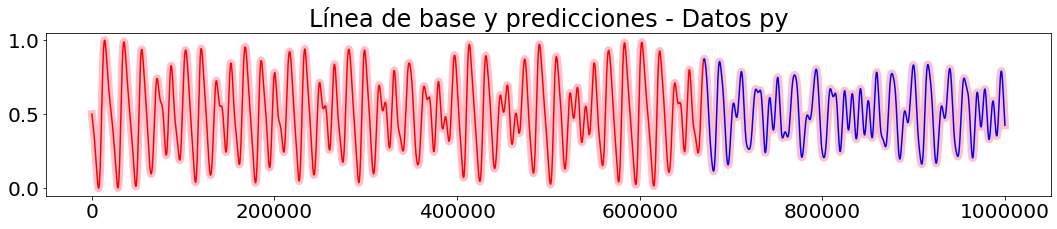

In [27]:
def plot_predictions(dataset, trainPredictPlot, testPredictPlot, title):
    
    for i in range(0,4):
        plt.figure(figsize=(18,3))
        plt.title("Línea de base y predicciones - Datos "+ str(title[i]))
        plt.plot(range(len(dataset[:,i])), dataset[:,i], 'pink', linewidth= 8)
        plt.plot(range(len(trainPredictPlot[:,i])), trainPredictPlot[:,i], 'r')
        plt.plot(range(len(testPredictPlot[:,i])), testPredictPlot[:,i], 'b')
        plt.show()
    
plot_predictions(dataset, trainPredictPlot, testPredictPlot, ["x", "y", "px", "py"])   

_____

## Sin el parámetro de no linealidad:

Reescribo el Hamiltoniano :
$$H = \frac{1}{2}(p_x^2+p_y^2) + \frac{1}{2}(x^2+y^2) $$

Donde surge un sistema de 4 ecuaciones diferenciales:


$$ \dot{x} = p_x$$
$$ \dot{y} =p_y$$

$$ \dot{p_x} = -x$$
$$ \dot{p_y} =-y$$

In [28]:
def xdot_l(x,y,ydot,E):
    xdot = np.sqrt(2*(E-((0.5*ydot**2)+(0.5*x**2)+ (0.5*x**2)+ (0.5*y**2))))
    return xdot 

def pend_l(y, t, xo_, yo_, xdot_, ydot_):
    X, Y, PX, PY = y
    dydt = [PX, PY, -X, -Y]
    return dydt


def condi_l(n, f, xo_, yo_, xdot_, ydot_):
    y0 = [xo_, yo_, xdot_, ydot_]
    t = np.linspace(0, 400, 1000)
    sol = odeint(f, y0, t, args=(xo_, yo_, xdot_, ydot_))
    
    
    plt.plot(sol[:, 0], sol[:, 1], 'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()
    
    return sol

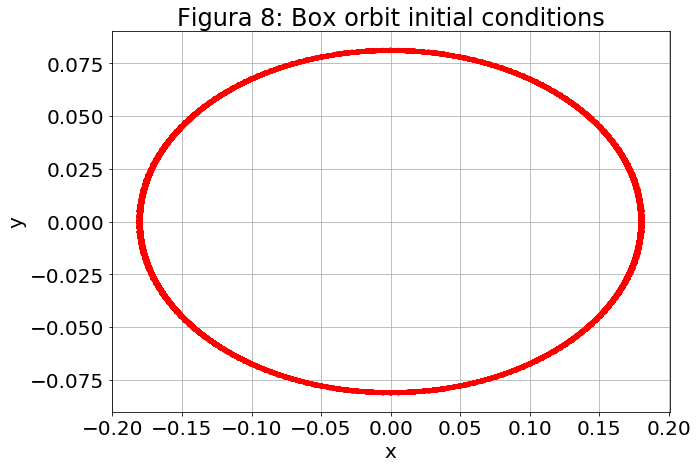

In [29]:
def orbit_l():
    plt.title('Figura 8: Box orbit initial conditions')
    yo_= -0.082
    xo_= 0.0
    ydot_= 0.0
    E_ = 0.02

    xdot_ = xdot_l( xo_,yo_, ydot_, E_)

    condi_l(1000, pend_l, xo_, yo_, xdot_, ydot_)
    
orbit_l()

In [30]:
def orbit_table():
    
    #initial conditions:
    yo_= -0.082
    xo_= 0.0
    ydot_= 0.0
    E_ = 0.02
    xdot_ = xdot_l(xo_,yo_, ydot_, E_)
    
    #integrate
    y0 = [xo_, yo_, xdot_, ydot_]
    t = np.linspace(0, 400, 1000000)
    sol = odeint(pend_l, y0, t, args=(xo_, yo_, xdot_, ydot_))
    
    ''' Shape: (1000, 4)
    plt.plot(t, sol[:, 0], 'b', label='x') sería todas las filas (t), columna 1 (x)  ''' 

    return sol

solution_l = orbit_table()
np.savetxt("data_lineal.csv", solution_l, delimiter=",")

In [31]:
np.shape(solution_l)

(1000000, 4)

In [32]:
dataset_l = pandas.read_csv('data_lineal.csv', engine='python', skipfooter=3)
dataset_l = dataset_l.values
dataset_l = dataset_l.astype('float32')

In [33]:
#normalizar los datos 
np.random.seed()
scaler_l = MinMaxScaler(feature_range=(0, 1))
dataset_l = scaler_l.fit_transform(dataset_l)

In [34]:
#Separar los datos: datos de entrenamiento un 67%

train_size_l  = int(len(dataset_l) * 0.67)
test_size_l   = len(dataset_l) - train_size_l
train_l, test_l = dataset_l[0:train_size_l,:], dataset_l[train_size_l:len(dataset_l),:]
print(train_l.shape, test_l.shape)

(669997, 4) (329999, 4)


In [35]:
look_back=3
ktrainX_l, trainY_l = create_dataset(train_l, look_back)
ktestX_l, testY_l   = create_dataset(test_l, look_back)

In [36]:
print("full original signal     ", dataset_l.shape)
print("original signal            train", train_l.shape, "test", test_l.shape)
print("keras input signal         train", ktrainX_l.shape, "test", ktestX_l.shape)

print(trainY_l.shape, testY_l.shape)

full original signal      (999996, 4)
original signal            train (669997, 4) test (329999, 4)
keras input signal         train (669994, 3, 4) test (329996, 3, 4)
(669994, 4) (329996, 4)


In [37]:
## build RNN

model_l = get_model(50, input_shape=[3,4])
clear_session()
model_l = Sequential()
lstm_l = LSTM(units=50, input_shape=[3,4], recurrent_activation="sigmoid")
dense_l = Dense(4)
model_l.add(lstm_l)
model_l.add(dense_l)
model_l.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
mhist_l = model_l.fit(ktrainX_l, trainY_l, epochs=5, batch_size=10, verbose=1)

Epoch 1/5
669994/669994 [==============================] - 271s 404us/step - loss: 1.1769e-04
Epoch 2/5
669994/669994 [==============================] - 304s 453us/step - loss: 1.0222e-06
Epoch 3/5
669994/669994 [==============================] - 302s 450us/step - loss: 7.5033e-07
Epoch 4/5
669994/669994 [==============================] - 302s 451us/step - loss: 5.6425e-07
Epoch 5/5
669994/669994 [==============================] - 306s 457us/step - loss: 5.2195e-07


In [39]:
y_train_pred_l = model_l.predict(ktrainX_l)
y_test_pred_l = model_l.predict(ktestX_l)

In [40]:
# shift train predictions for plotting
trainPredictPlot_l = numpy.empty_like(dataset_l)
trainPredictPlot_l[:, :] = numpy.nan
trainPredictPlot_l[look_back:len(y_train_pred_l)+look_back, :] = y_train_pred_l

In [41]:
# shift test predictions for plotting
testPredictPlot_l = numpy.empty_like(dataset)
testPredictPlot_l[:, :] = numpy.nan
testPredictPlot_l[len(y_train_pred_l)+(look_back*2):len(dataset_l)+1, :] = y_test_pred_l

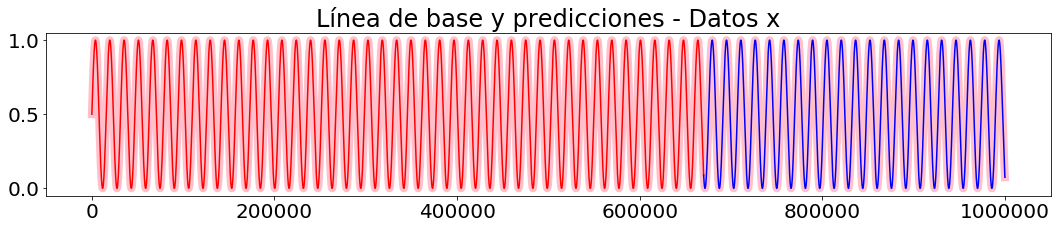

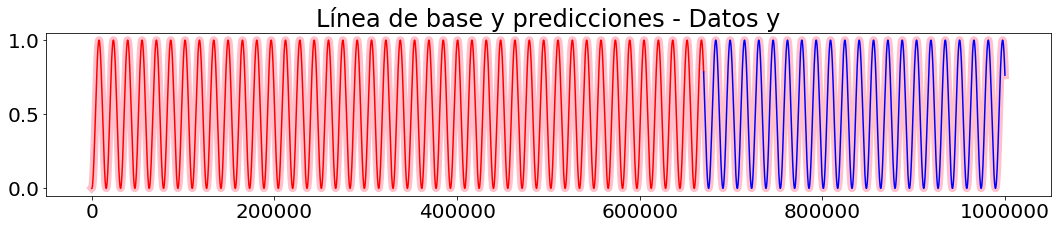

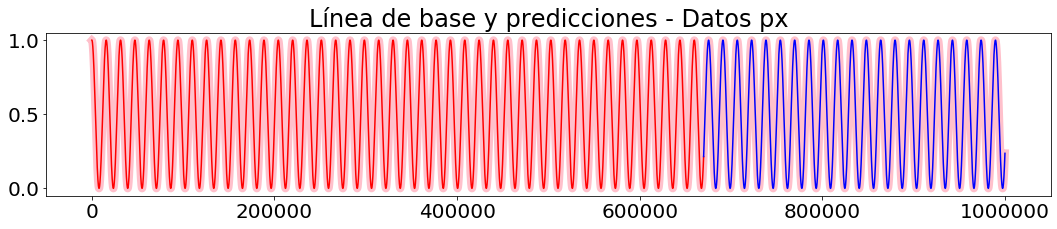

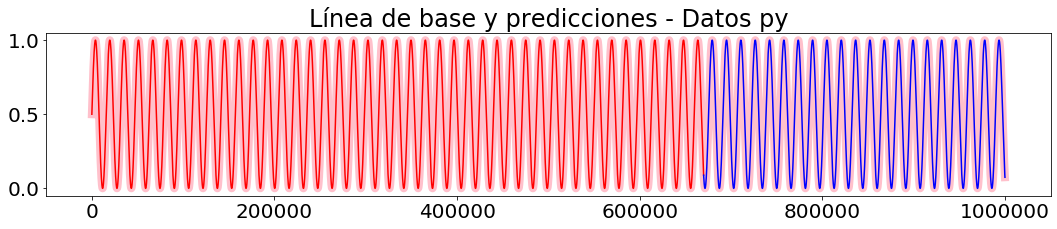

In [42]:
plot_predictions(dataset_l, trainPredictPlot_l, testPredictPlot_l, ["x", "y", "px", "py"])   

____

## Precisión de predicción:

El sistema caótico será mucho más dificil de predecir para la red neuronal y por lo tanto el valor absoluto de la diferencia entre la predicción y los datos de la integración será mucho mayor:

/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


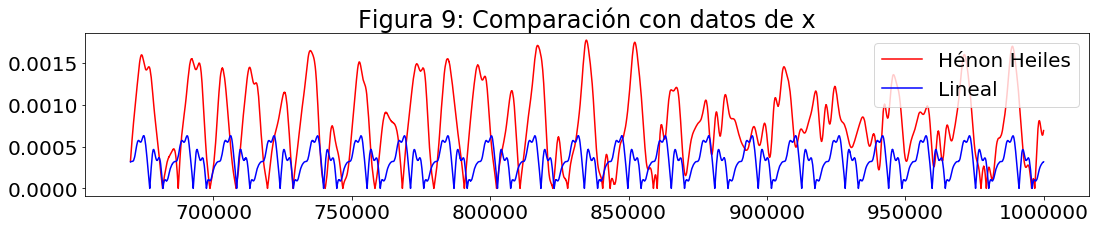

/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


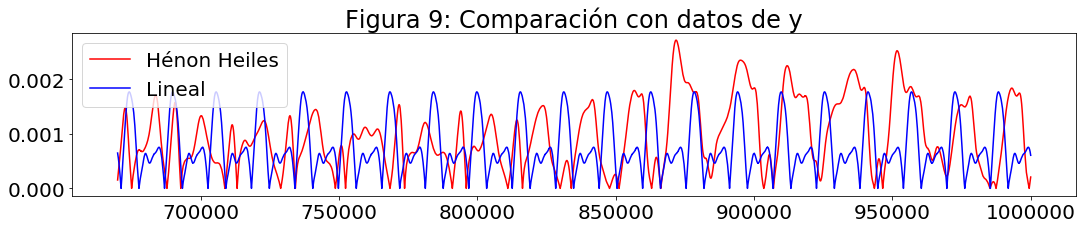

/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


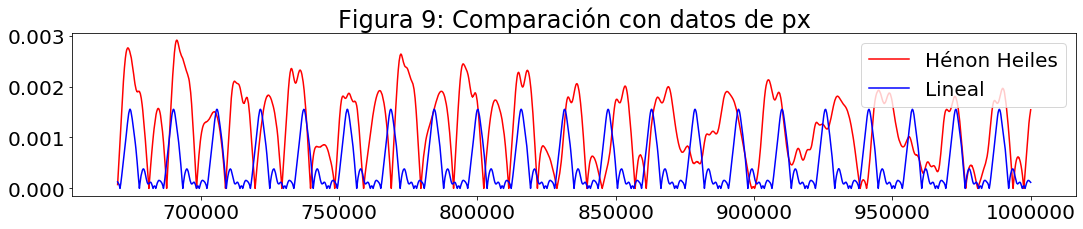

/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


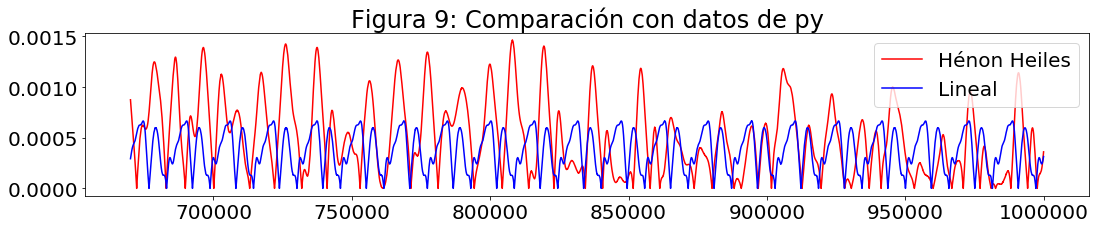

In [43]:
def plot_absolute_value(dataset, trainPredictPlot, testPredictPlot, dataset_l, trainPredictPlot_l, testPredictPlot_l, title):
    
    for i in range(0,4):
        plt.figure(figsize=(18,3))
        plt.title('Figura 9: Comparación con datos de ' + str(title[i]))
        x = np.absolute(dataset[:,i] - testPredictPlot[:,i])
        y = np.absolute(dataset_l[:,i] - testPredictPlot_l[:,i])
        plt.plot(range(len(x)), x, "r", label="Hénon Heiles")
        plt.plot(range(len(y)), y, "b",label="Lineal" )
        plt.legend()
        plt.show()
    
plot_absolute_value(dataset, trainPredictPlot, testPredictPlot, dataset_l, trainPredictPlot_l, testPredictPlot_l, ["x", "y", "px", "py"])   

# Referencias:

- [1] Emanuelsson, C. Chaos in the Hénon-Heiles system. University of Karlstad (https://jfuchs.hotell.kau.se/kurs/amek/prst/11_hehe.pdf)
- [2] Goldstein, Herbert; Poole, C. P.; Safko, J. L. (2001). Classical Mechanics (3rd ed.). Addison-Wesley. ISBN 978-0-201-65702-9.
- [3] From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/Hénon–Heiles_system)
- [4] Zotos, E. E. (2014). Classifying orbits in the classical Hénon–Heiles Hamiltonian system. Nonlinear Dynamics, 79(3), 1665–1677. doi:10.1007/s11071-014-1766-6 
- [5] Brownlee, C. Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras (https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)